In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [30]:
train_merged_data = pd.read_csv("train_store_df.csv", encoding_errors = "ignore")
test_merged_data = pd.read_csv("test_store_df.csv", encoding_errors = "ignore")

In [31]:
train_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2013-01-01,1115,2,0,0,1,1,3,2,5350.0,...,2,2013,1,1,1,1,9.493619,1,0,0
1,2013-01-01,379,2,0,0,1,1,3,0,6630.0,...,3,2013,1,1,1,1,9.493619,1,0,0
2,2013-01-01,378,2,0,0,1,1,0,2,2140.0,...,3,2013,1,1,1,1,9.493619,1,0,0
3,2013-01-01,377,2,0,0,1,1,0,2,100.0,...,0,2013,1,1,1,1,9.493619,1,0,0
4,2013-01-01,376,2,0,0,1,1,0,0,160.0,...,3,2013,1,1,1,1,9.493619,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2015-07-31,746,5,1,1,0,1,3,2,4330.0,...,2,2015,7,31,0,3,14.235110,0,0,1
1017205,2015-07-31,747,5,1,1,0,1,2,2,45740.0,...,3,2015,7,31,0,3,12.963680,0,0,1
1017206,2015-07-31,748,5,1,1,0,1,3,0,2380.0,...,1,2015,7,31,0,3,12.942907,0,0,1
1017207,2015-07-31,742,5,1,1,0,1,3,2,4380.0,...,3,2015,7,31,0,3,10.295276,0,0,1


In [32]:
test_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2015-08-01,1115,6,1.0,0,0,1,3,2,5350.0,...,2012.000000,2,2015,8,1,0,3,1,0,0
1,2015-08-01,378,6,1.0,0,0,0,0,2,2140.0,...,2011.820926,3,2015,8,1,0,3,1,0,0
2,2015-08-01,377,6,1.0,0,0,0,0,2,100.0,...,2010.000000,0,2015,8,1,0,3,1,0,0
3,2015-08-01,373,6,1.0,0,0,0,3,2,11120.0,...,2012.000000,1,2015,8,1,0,3,1,0,0
4,2015-08-01,372,6,1.0,0,0,0,3,2,4880.0,...,2014.000000,1,2015,8,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,2015-09-17,732,4,1.0,1,0,0,0,2,35280.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41084,2015-09-17,731,4,1.0,1,0,0,0,0,15270.0,...,2014.000000,1,2015,9,17,1,3,0,1,0
41085,2015-09-17,729,4,1.0,1,0,0,2,2,8980.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41086,2015-09-17,727,4,1.0,1,0,0,0,0,2050.0,...,2011.820926,3,2015,9,17,1,3,0,1,0


In [33]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Open                       1017209 non-null  int64  
 4   Promo                      1017209 non-null  int64  
 5   StateHoliday               1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   StoreType                  1017209 non-null  int64  
 8   Assortment                 1017209 non-null  int64  
 9   CompetitionDistance        1017209 non-null  float64
 10  CompetitionOpenSinceMonth  1017209 non-null  float64
 11  CompetitionOpenSinceYear   1017209 non-null  float64
 12  Promo2                     1017209 non-null  int64  
 13  Promo2SinceW

In [34]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       41088 non-null  object 
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  int64  
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  int64  
 8   Assortment                 41088 non-null  int64  
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            41088 non-null  flo

In [35]:
train_merged_data.set_index('Date', inplace=True)
train_merged_data.sort_index(inplace=True)

In [36]:
X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]
y = train_merged_data['SalesPerCustomer']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [38]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-10,895,5,1,1,0,0,0,2,4150.0,7.222866,...,2011.752774,3,2014,1,10,0,1,0,1,0
2014-08-24,509,7,0,0,0,1,0,0,4740.0,7.000000,...,2009.000000,1,2014,8,24,0,3,0,0,0
2014-11-18,440,2,1,0,0,0,3,0,3900.0,4.000000,...,2009.000000,0,2014,11,18,1,4,0,1,0
2013-04-09,37,2,1,1,0,0,2,0,4230.0,12.000000,...,2011.752774,3,2013,4,9,1,2,0,0,0
2014-01-14,706,2,1,0,0,0,3,0,7830.0,9.000000,...,2014.000000,2,2014,1,14,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-21,159,3,1,0,0,1,3,0,8530.0,3.000000,...,2011.752774,3,2013,8,21,1,3,0,0,0
2013-11-25,332,1,1,0,0,0,0,0,1840.0,3.000000,...,2011.752774,3,2013,11,25,1,4,0,0,0
2013-04-29,17,1,1,1,0,0,0,0,50.0,12.000000,...,2010.000000,1,2013,4,29,1,2,0,0,0


In [39]:
X_test

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-10,909,7,0,0,0,0,0,2,1680.0,7.222866,...,2009.000000,0,2013,3,10,0,1,0,1,0
2015-05-08,943,5,1,1,0,0,3,2,18020.0,7.222866,...,2011.752774,3,2015,5,8,0,2,0,0,0
2014-11-08,782,6,1,0,0,0,2,2,5390.0,8.000000,...,2012.000000,1,2014,11,8,0,4,0,0,0
2015-01-09,968,5,1,1,0,0,2,0,1190.0,7.222866,...,2011.752774,3,2015,1,9,0,1,0,0,0
2013-08-15,515,4,1,1,0,1,3,2,11260.0,7.222866,...,2011.000000,0,2013,8,15,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-31,1077,6,1,0,0,0,0,0,3750.0,11.000000,...,2010.000000,2,2014,5,31,0,2,0,0,1
2014-12-01,424,1,1,1,0,0,3,2,1250.0,7.222866,...,2011.000000,1,2014,12,1,1,4,1,0,0
2013-02-04,702,1,1,1,0,0,0,0,8550.0,9.000000,...,2009.000000,0,2013,2,4,1,1,0,0,0


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()

In [41]:
pipeline = Pipeline([
    ('imputer', StandardScaler()),  # Feature scaling (optional)
    ('refressor', regressor)])

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', StandardScaler()),
                ('refressor', LinearRegression())])

In [43]:
y_pred = pipeline.predict(X_test)
     

In [44]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.7168604478654887


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test))
     


Epoch 1/5
25431/25431 [==============================] - 388s 15ms/step - loss: 1764.0734 - val_loss: 4.4756
Epoch 2/5
25431/25431 [==============================] - 401s 16ms/step - loss: 47.3267 - val_loss: 5.1684
Epoch 3/5
25431/25431 [==============================] - 388s 15ms/step - loss: 162.3991 - val_loss: 20.1076
Epoch 4/5
25431/25431 [==============================] - 387s 15ms/step - loss: 30.6168 - val_loss: 3.4283
Epoch 5/5
25431/25431 [==============================] - 384s 15ms/step - loss: 3.9751 - val_loss: 3.4903


In [46]:

from sklearn.metrics import mean_squared_error

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)

6358/6358 [==============================] - 44s 7ms/step
Mean Squared Error (LSTM): 3.490251552058965


# Post Prediction Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

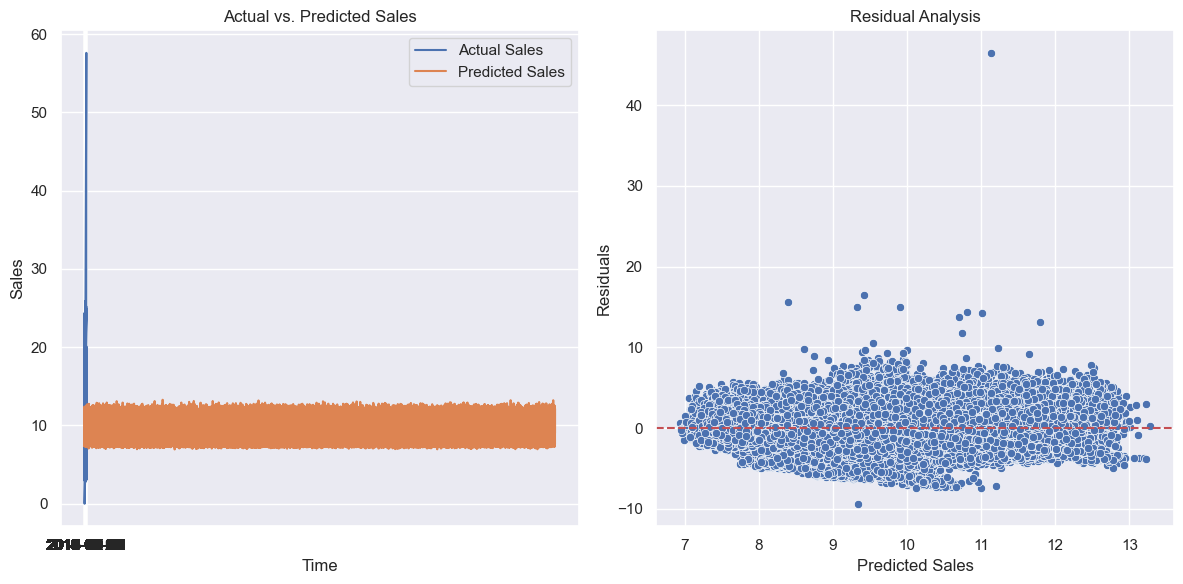

MAE for Store Type '0': 1.288749385746864
MAE for Store Type '1': 1.288749385746864
MAE for Store Type '2': 1.288749385746864
MAE for Store Type '3': 1.288749385746864


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Visualize predictions and residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Analysis")

plt.tight_layout()
plt.show()
from sklearn.metrics import mean_absolute_error

# Segment analysis (example)
store_type_segments = train_merged_data.groupby('StoreType')
for store_type, group in store_type_segments:
    segment_mae = mean_absolute_error(y_test,y_pred)
    print(f"MAE for Store Type '{store_type}': {segment_mae}") 

In [49]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

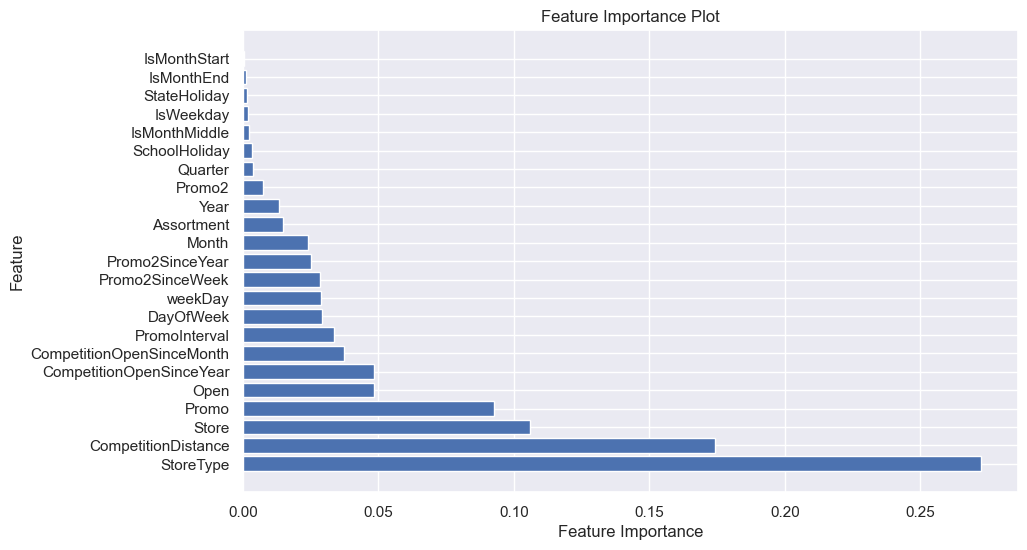

In [50]:
# Define features and target
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']
target = 'SalesPerCustomer'

# Assuming train_data_merged contains your preprocessed data
train_features = train_merged_data[features]
train_labels = train_merged_data[target]

model = RandomForestRegressor()
model.fit(train_features, train_labels)
# Retrieve feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
     

In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
predictions = model.predict(X_train)